<a href="https://colab.research.google.com/github/fsoaresg/Desafio-Alura-Store-Latam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Challenge Alura Store**

---



El objetivo es identificar la tienda menos eficiente y presentar una recomendación final basada en los datos que ayuden al Sr. Juan a decidir qué tienda de su cadena Alura Store debe vender para iniciar un nuevo emprendimiento. Para ello, se analizarán datos de ventas, rendimiento y reseñas de las 4 tiendas de Alura Store

## ***Importación de datos***
---

In [105]:
import pandas as pd
import numpy as np

url1 = "https://raw.githubusercontent.com/fsoaresg/Desafio-Alura-Store-Latam/main/base-de-datos-alura-store-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/fsoaresg/Desafio-Alura-Store-Latam/main/base-de-datos-alura-store-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/fsoaresg/Desafio-Alura-Store-Latam/main/base-de-datos-alura-store-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/fsoaresg/Desafio-Alura-Store-Latam/main/base-de-datos-alura-store-latam/tienda_4.csv"

df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)
df3 = pd.read_csv(url3)
df4 = pd.read_csv(url4)

df1

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
...,...,...,...,...,...,...,...,...,...,...,...,...
2354,Iphone 15,Electrónicos,1284400.0,66600.0,15/11/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
2355,Impresora,Electrónicos,282800.0,15300.0,18/03/2023,Lucas Olivera,Bogotá,5,Nequi,1,4.60971,-74.08175
2356,Juego de mesa,Juguetes,122900.0,7200.0,06/07/2021,Lucas Olivera,Cali,5,Tarjeta de crédito,4,3.43722,-76.52250
2357,Cama box,Muebles,691300.0,35000.0,02/05/2022,Pedro Gomez,Pasto,1,Tarjeta de crédito,2,1.21361,-77.28111


## ***Análisis de datos***
---

### *1. Análisis de facturación*



In [106]:
#Ingreso total por cada tienda

ingresos = {
    "Tienda 1": df1["Precio"].sum(),
    "Tienda 2": df2["Precio"].sum(),
    "Tienda 3": df3["Precio"].sum(),
    "Tienda 4": df4["Precio"].sum()
}

ingresos_df = pd.DataFrame.from_dict(
    ingresos,
    orient="index",
    columns=["Ingresos Totales"]
)

# Total ingresos todas las tiendas
total_ingresos = ingresos_df["Ingresos Totales"].sum()

# Porcentaje de ingresos por tienda
ingresos_df["Porcentaje del Total (%)"] = (ingresos_df["Ingresos Totales"] / total_ingresos * 100)

# Guardo los resultados obtenidos en un nuevo data frame para mejorar su estetica y facilitar la comprensión de los resultados al mostrarlos
ingresos_df_show = ingresos_df.copy()

def formato_moneda(valor):
    return "$ " + f"{valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

ingresos_df_show["Ingresos Totales"] = ingresos_df_show["Ingresos Totales"].apply(formato_moneda)
ingresos_df_show["Porcentaje del Total (%)"] = ingresos_df_show["Porcentaje del Total (%)"].round(2)

ingresos_df_show

,Ingresos Totales,Porcentaje del Total (%)
Tienda 1,"$ 1.150.880.400,00",26.13
Tienda 2,"$ 1.116.343.500,00",25.35
Tienda 3,"$ 1.098.019.600,00",24.93
Tienda 4,"$ 1.038.375.700,00",23.58


In [107]:
# Imprimir la tienda que genera más ingresos y la tienda que genera menos ingresos

def formato_moneda(valor, pos=None):
    return "$ " + f"{valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

tienda_max = ingresos_df["Ingresos Totales"].idxmax()
tienda_min = ingresos_df["Ingresos Totales"].idxmin()

valor_max = ingresos_df.loc[tienda_max, "Ingresos Totales"]
porcentaje_max = ingresos_df.loc[tienda_max, "Porcentaje del Total (%)"]

valor_min = ingresos_df.loc[tienda_min, "Ingresos Totales"]
porcentaje_min = ingresos_df.loc[tienda_min, "Porcentaje del Total (%)"]

BOLD = '\033[1m'
ITALIC = '\033[3m'
END = '\033[0m'

print(f"{BOLD}\nLa {tienda_max} es la que genera más ingresos:{END} {formato_moneda(valor_max)} pesos, lo que representa un {porcentaje_max:.2f}% de las ventas totales")
print(f"y {ITALIC}la {tienda_min} es la que genera menos ingresos{END}: {formato_moneda(valor_min)} pesos, lo que representa un {porcentaje_min:.2f}% de las ventas totales")


La Tienda 1 es la que genera más ingresos: $ 1.150.880.400,00 pesos, lo que representa un 26.13% de las ventas totales
y la Tienda 4 es la que genera menos ingresos: $ 1.038.375.700,00 pesos, lo que representa un 23.58% de las ventas totales


### *2. Ventas por categoría*

In [108]:
dfs = [df1, df2, df3, df4]
store_names = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

In [109]:
# Ventas por categoría

resultados_ventas_categorias = []

for i, df in enumerate(dfs):
    ventas_categorias = df["Categoría del Producto"].value_counts()

    for categoria, cantidad in ventas_categorias.items():
        resultados_ventas_categorias.append({
            "Tienda": store_names[i],
            "Categoría": categoria,
            "Cantidad Vendida": cantidad
        })

resumen_ventas_categorias = pd.DataFrame(resultados_ventas_categorias)
resumen_ventas_categorias

,Tienda,Categoría,Cantidad Vendida
0,Tienda 1,Muebles,465
1,Tienda 1,Electrónicos,448
2,Tienda 1,Juguetes,324
3,Tienda 1,Electrodomésticos,312
4,Tienda 1,Deportes y diversión,284
5,Tienda 1,Instrumentos musicales,182
6,Tienda 1,Libros,173
7,Tienda 1,Artículos para el hogar,171
8,Tienda 2,Muebles,442
9,Tienda 2,Electrónicos,422


In [110]:
# Imprimir la categoría con más ventas y la categoría con menos ventas
ventas_globales_categoria = resumen_ventas_categorias.groupby("Categoría")["Cantidad Vendida"].sum()

categoria_max = ventas_globales_categoria.idxmax()
categoria_min = ventas_globales_categoria.idxmin()

BOLD = '\033[1m'
ITALIC = '\033[3m'
END = '\033[0m'

print(f"{BOLD}\nLa categoria con más ventas en todas las tiendas es {categoria_max}{END}\ny {ITALIC}la categoria con menos ventas es {categoria_min}{END}")


La categoria con más ventas en todas las tiendas es Muebles
y la categoria con menos ventas es Artículos para el hogar


### *3. Calificación promedio de la tienda*


In [111]:
# Valoración media por tienda

resultados_calificacion = []

for i, df in enumerate(dfs):
    calificacion = df['Calificación'].mean().round(2)

    resultados_calificacion.append({
        'Tienda': store_names[i],
        'Calificación Promedio': calificacion,
    })

resumen_calificacion = pd.DataFrame(resultados_calificacion)
resumen_calificacion

,Tienda,Calificación Promedio
0,Tienda 1,3.98
1,Tienda 2,4.04
2,Tienda 3,4.05
3,Tienda 4,4.00


In [112]:
# Imprimir la tienda con una calificación promedio (satisfacción del cliente) más alta y la tienda con una calificación promedio mñas baja

tienda_max_calificacion = resumen_calificacion.loc[resumen_calificacion['Calificación Promedio'].idxmax()]
tienda_min_calificacion = resumen_calificacion.loc[resumen_calificacion['Calificación Promedio'].idxmin()]

BOLD = '\033[1m'
ITALIC = '\033[3m'
END = '\033[0m'

print(f"{BOLD}\nLa {tienda_max_calificacion['Tienda']} tiene la calificación promedio (satisfacción del cliente) más alta: {tienda_max_calificacion['Calificación Promedio']}{END}")
print(f"y {ITALIC}la {tienda_min_calificacion['Tienda']} tiene la calificación promedio más baja: {tienda_min_calificacion['Calificación Promedio']}{END}")


La Tienda 3 tiene la calificación promedio (satisfacción del cliente) más alta: 4.05
y la Tienda 1 tiene la calificación promedio más baja: 3.98


### *4. Productos más y menos vendidos*

In [113]:
# Productos más vendidos y menos vendidos

filas = []

for i, df in enumerate(dfs):
    tienda = store_names[i]

    mas_productos = df['Producto'].value_counts().head(5)
    menos_productos = df['Producto'].value_counts().tail(5)

    for producto, cantidad in mas_productos.items():
        filas.append({
            'Tienda': tienda,
            'Tipo': 'Más vendido',
            'Producto': producto,
            'Cantidad': cantidad
        })

    for producto, cantidad in menos_productos.items():
        filas.append({
            'Tienda': tienda,
            'Tipo': 'Menos vendido',
            'Producto': producto,
            'Cantidad': cantidad
        })

resumen_productos = pd.DataFrame(filas)
resumen_productos

,Tienda,Tipo,Producto,Cantidad
0,Tienda 1,Más vendido,Microondas,60
1,Tienda 1,Más vendido,TV LED UHD 4K,60
2,Tienda 1,Más vendido,Armario,60
3,Tienda 1,Más vendido,Secadora de ropa,58
4,Tienda 1,Más vendido,Mesa de noche,56
5,Tienda 1,Menos vendido,Ciencia de datos con Python,39
6,Tienda 1,Menos vendido,Pandereta,36
7,Tienda 1,Menos vendido,Olla de presión,35
8,Tienda 1,Menos vendido,Auriculares con micrófono,33
9,Tienda 1,Menos vendido,Celular ABXY,33


In [114]:
# Producto más vendido y menos vendido

resultados_productos = []

for i, df in enumerate(dfs):
    mas_productos = df['Producto'].value_counts().idxmax()
    menos_productos = df['Producto'].value_counts().idxmin()

    resultados_productos.append({
        'Tienda': store_names[i],
        'Producto más vendido': mas_productos,
        'Producto menos Vendido': menos_productos
    })

resumen_producto = pd.DataFrame(resultados_productos)
resumen_producto

,Tienda,Producto más vendido,Producto menos Vendido
0,Tienda 1,Microondas,Auriculares con micrófono
1,Tienda 2,Iniciando en programación,Juego de mesa
2,Tienda 3,Kit de bancas,Bloques de construcción
3,Tienda 4,Cama box,Guitarra eléctrica


In [115]:
# Imprimir los productos más vendidos y los productos menos vendidos en las sucursales

lista_mas_vendidos = resumen_producto['Producto más vendido'].unique()
lista_menos_vendidos = resumen_producto['Producto menos Vendido'].unique()

prod_top_str = ", ".join(lista_mas_vendidos)
prod_bot_str = ", ".join(lista_menos_vendidos)

BOLD = '\033[1m'
ITALIC = '\033[3m'
END = '\033[0m'

print(f"{BOLD}\nLos productos más vendidos son: {prod_top_str}{END};\ny {ITALIC}los menos vendidos son: {prod_bot_str}.{END}")


Los productos más vendidos son: Microondas, Iniciando en programación, Kit de bancas, Cama box;
y los menos vendidos son: Auriculares con micrófono, Juego de mesa, Bloques de construcción, Guitarra eléctrica.


### *5. Envío promedio por tienda*

In [116]:
# Valor del envío promedio por tienda

resultados_envios = []

for i, df in enumerate(dfs):
    envio = df['Costo de envío'].mean().round(2)

    resultados_envios.append({
        'Tienda': store_names[i],
        'Costo Envío Promedio': envio,
    })

resumen_envios = pd.DataFrame(resultados_envios)
resumen_envios

,Tienda,Costo Envío Promedio
0,Tienda 1,26018.61
1,Tienda 2,25216.24
2,Tienda 3,24805.68
3,Tienda 4,23459.46


In [117]:
# Imprimir la tienda que tiene el costo promedio de envío más alto y la tienda que tiene el costo promedio de envío más bajo

tienda_max_envio = resumen_envios.loc[resumen_envios['Costo Envío Promedio'].idxmax()]
tienda_min_envio = resumen_envios.loc[resumen_envios['Costo Envío Promedio'].idxmin()]

BOLD = '\033[1m'
ITALIC = '\033[3m'
END = '\033[0m'

print(f"{BOLD}\nLa {tienda_max_envio['Tienda']} tiene el costo de envío promedio más alto: ${tienda_max_envio['Costo Envío Promedio']} pesos,{END}")
print(f"y {ITALIC}la {tienda_min_envio['Tienda']} tiene el costo de envío promedio más bajo: ${tienda_min_envio['Costo Envío Promedio']} pesos.{END}")


La Tienda 1 tiene el costo de envío promedio más alto: $26018.61 pesos,
y la Tienda 4 tiene el costo de envío promedio más bajo: $23459.46 pesos.


### *6. Matriz de Eficiencia - Satisfacción vs Costo de Envío*

In [118]:
# Crear la matriz de eficiencia - calificación promedio vs costo de envío

matriz_eficiencia = resumen_calificacion.merge(
    resumen_envios,
    on="Tienda"
)
matriz_eficiencia


,Tienda,Calificación Promedio,Costo Envío Promedio
0,Tienda 1,3.98,26018.61
1,Tienda 2,4.04,25216.24
2,Tienda 3,4.05,24805.68
3,Tienda 4,4.00,23459.46


### *7. Matriz de Valor Estratégico - Satisfacción vs Ingresos*

In [119]:
# Crear la matriz de valor estratégico - calificación promedio vs ingresos

ingresos_show = ingresos_df[["Ingresos Totales"]].reset_index()
ingresos_show.columns = ["Tienda", "Ingresos Totales"]

matriz_valor = resumen_calificacion.merge(
    ingresos_show[["Tienda", "Ingresos Totales"]],
    on="Tienda"
)

matriz_valor_show = matriz_valor.copy()

def formato_moneda(valor):
    return "$ " + f"{valor:,.0f}".replace(",", "X").replace(".", ",").replace("X", ".")

matriz_valor_show["Ingresos Totales"] = (
    matriz_valor_show["Ingresos Totales"].apply(formato_moneda)
)

matriz_valor_show

,Tienda,Calificación Promedio,Ingresos Totales
0,Tienda 1,3.98,$ 1.150.880.400
1,Tienda 2,4.04,$ 1.116.343.500
2,Tienda 3,4.05,$ 1.098.019.600
3,Tienda 4,4.00,$ 1.038.375.700


In [120]:
# Estimar el coeficiente de correlación entre las matriz de eficiencia y la matriz de valor estratégico

correlacion = matriz_valor["Ingresos Totales"].corr(
    matriz_eficiencia["Costo Envío Promedio"]
)
print(f"La correlación positiva muy fuerte (r = {correlacion:.5f}) evidencia que las tiendas que presentan mayores niveles de satisfacción")
print(f"tienden a mantener un desempeño consistente tanto en términos de eficiencia operativa (costos de envío) como de valor")
print(f"estratégico (ingresos), lo que explica la similitud en la distribución de los datos en ambas matrices")

La correlación positiva muy fuerte (r = 0.99997) evidencia que las tiendas que presentan mayores niveles de satisfacción
tienden a mantener un desempeño consistente tanto en términos de eficiencia operativa (costos de envío) como de valor
estratégico (ingresos), lo que explica la similitud en la distribución de los datos en ambas matrices


### *8. Criterios Adicionales de Decisión*

#### *8.1 Eficiencia Global*

In [121]:
# Cálcular la Eficiencia Global de las tiendas

dfs = [df1, df2, df3, df4]
store_names = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
metrics = []

for i, df in enumerate(dfs):
    metrics.append({
        'Tienda': store_names[i],
        'Ingresos': df['Precio'].sum(),
        'Satisfaccion': df['Calificación'].mean(),
        'Costos_Envio': df['Costo de envío'].sum()
    })

df_analisis = pd.DataFrame(metrics)

df_analisis['Ingresos_Norm'] = df_analisis['Ingresos'] / df_analisis['Ingresos'].max()
df_analisis['Satisfaccion_Norm'] = df_analisis['Satisfaccion'] / df_analisis['Satisfaccion'].max()
df_analisis['Costos_Norm'] = df_analisis['Costos_Envio'] / df_analisis['Costos_Envio'].max()

df_analisis['Eficiencia_Global'] = (
    (df_analisis['Ingresos_Norm'] * 50) +
    (df_analisis['Satisfaccion_Norm'] * 30) -
    (df_analisis['Costos_Norm'] * 20)
)

df_EG_show = df_analisis.copy()

def formato_moneda(valor):
    return "$ {:,.0f}".format(valor)

df_EG_show['Ingresos'] = df_analisis['Ingresos'].apply(formato_moneda)
df_EG_show['Satisfaccion'] = df_analisis['Satisfaccion'].apply(lambda x: f"{x:.2f}")
df_EG_show['Eficiencia_Global'] = df_analisis['Eficiencia_Global'].apply(lambda x: f"{x:.2f}")

ranking = df_EG_show[['Tienda', 'Ingresos', 'Satisfaccion', 'Eficiencia_Global']].sort_values(
    by='Eficiencia_Global', ascending=False
)

ranking

,Tienda,Ingresos,Satisfaccion,Eficiencia_Global
0,Tienda 1,"$ 1,150,880,400",3.98,59.47
1,Tienda 2,"$ 1,116,343,500",4.04,59.03
2,Tienda 3,"$ 1,098,019,600",4.05,58.64
3,Tienda 4,"$ 1,038,375,700",4.00,56.70


In [122]:
# Imprimir la tienda con mayor y menor eficiencia global

max_tienda = df_analisis.loc[df_analisis['Eficiencia_Global'].idxmax(), 'Tienda']
min_tienda = df_analisis.loc[df_analisis['Eficiencia_Global'].idxmin(), 'Tienda']

BOLD = '\033[1m'
ITALIC = '\033[3m'
END = '\033[0m'

print(f"{BOLD}La tienda con mayor eficiencia global es: {max_tienda}{END}")
print(f"{ITALIC}La tienda con menor eficiencia global es: {min_tienda}{END}")

La tienda con mayor eficiencia global es: Tienda 1
La tienda con menor eficiencia global es: Tienda 4


> **Se define la Eficiencia Global** como la capacidad de una sucursal para maximizar el margen operativo (Ingresos menos Costos de Envío) manteniendo estándares de satisfacción del cliente superiores a 4.0.

> ***Bajo este estándar, la Tienda 4 se identifica como la menos eficiente***

> **Nota metodológica:** La *Eficiencia Global* se calculó priorizando el Ingreso Neto (50%) y la Satisfacción del Cliente (30%), restando el peso del Costo de Envío (20%). Este índice permite identificar qué sucursal aporta menos valor real al negocio de la cadena Alura Store.

#### *8.2 Análisis de causa raíz de la tienda con menor eficiencia global (Tienda 4)*

##### *8.2.1 Peores categorías según satisfacción de la Tienda 4*

In [123]:
# Peores categorías según satisfacción de la Tienda 4

BOLD = '\033[1m'
ITALIC = '\033[3m'
END = '\033[0m'

print(f"\n{BOLD}--- ANÁLISIS DE LA EXPERIENCIA EN TIENDA 4 ---{END}")

peores_categorias = df4.groupby('Categoría del Producto')['Calificación'].mean().sort_values().head(3)
print(f"\n{BOLD} Peores categorías (promedio de Satisfacción):{END}")
for cat, valor in peores_categorias.items():
    print(f"- {cat}: {valor:.2f}")


--- ANÁLISIS DE LA EXPERIENCIA EN TIENDA 4 ---

 Peores categorías (promedio de Satisfacción):
- Instrumentos musicales: 3.91
- Electrodomésticos: 3.93
- Juguetes: 3.99


> La baja calificación de la Tienda 4 está impulsada principalmente por dos categorías que presentan promedios por debajo de la media de la tienda (3.99):
> - Instrumentos musicales (3.91): Es la categoría con el desempeño más bajo.

> - Electrodomésticos (3.93): También muestra una satisfacción reducida.

##### *8.2.2 Productos específicos con baja calificación (Detractores) de la Tienda 4*

In [124]:
# Productos específicos con baja calificación (Detractores) de la Tienda 4

print(f"\n{BOLD}--- ANÁLISIS DE LA EXPERIENCIA EN TIENDA 4 ---{END}")

peores_productos = df4.groupby('Producto')['Calificación'].mean()
detractores = peores_productos[peores_productos < 3.85].sort_values()
print(f"\n{BOLD} Productos Detractores (Calificación < 3.85):{END}")
for prod, valor in detractores.items():
    print(f"- {prod}: {valor:.2f}")


--- ANÁLISIS DE LA EXPERIENCIA EN TIENDA 4 ---

 Productos Detractores (Calificación < 3.85):
- TV LED UHD 4K: 3.58
- Guitarra acústica: 3.68
- Mesa de centro: 3.75
- Pandereta: 3.77
- Guitarra eléctrica: 3.79
- Bloques de construcción: 3.81
- Secadora de ropa: 3.83
- Estufa: 3.83
- Mochila: 3.84
- Ciencia de datos con Python: 3.84


> Hay 4 productos que son los principales responsables de las malas reseñas en esta tienda por su calificación promedio:

> - TV LED UHD 4K: Tiene un promedio de 3.58 (muy bajo para el estándar de Alura Store).

> - Guitarra acústica: calificación de 3.68.

> - Mesa de centro: calificación de 3.75.

> - Pandereta: calificación de 3.77.

##### *8.2.3 Análisis de vendedores en Tienda 4*


In [125]:
# Análisis de vendedores en Tienda 4

print(f"\n{BOLD}--- ANÁLISIS DE LA EXPERIENCIA EN TIENDA 4 ---{END}")

vendedores_t4 = df4.groupby('Vendedor')['Calificación'].mean().sort_values()
print(f"\n{BOLD} Promedio de calificación por vendedor en Tienda 4:{END}")
for vend, valor in vendedores_t4.items():
    print(f"- {vend}: {valor:.2f}")

# Peor vendedor en Tienda 4

peor_vendedor_nombre = vendedores_t4.idxmin()
peor_vendedor_calif = vendedores_t4.min()
print(f"\n{BOLD}Peor vendedor de la Tienda 4 es: {peor_vendedor_nombre}{END} con calificación de {peor_vendedor_calif:.2f}")

BOLD = '\033[1m'
END = '\033[0m'

vendedor_especifico = 'Pedro Gomez'

print(f"\n{BOLD}--- Desempeño de {vendedor_especifico} en todas las tiendas ---{END}\n")

resumen_vendedor = []

tiendas_lista = [df1, df2, df3, df4]
nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

for i, df in enumerate(tiendas_lista):
    if vendedor_especifico in df['Vendedor'].values:
        promedio = df[df['Vendedor'] == vendedor_especifico]['Calificación'].mean()
        resumen_vendedor.append({
            'Tienda': nombres[i],
            'Vendedor': vendedor_especifico,
            'Calificación': promedio
        })

# Desempeño del peor vendedor de la Tienda 4 en el resto de las sucursales

df_pedro = pd.DataFrame(resumen_vendedor)

df_pedro_show = df_pedro.copy()

df_pedro_show['Calificación'] = df_pedro_show['Calificación'].apply(lambda x: f"{x:.2f}")

print(df_pedro_show[['Tienda', 'Vendedor', 'Calificación']].to_string(index=False))

promedio_global = df_pedro['Calificación'].mean()

print(f"\n{ITALIC}Promedio global de {vendedor_especifico} en toda la cadena: {promedio_global:.2f}{END}\n{BOLD}pero en la Tienda 4 su promedio cae a 3.85.{END}")


--- ANÁLISIS DE LA EXPERIENCIA EN TIENDA 4 ---

 Promedio de calificación por vendedor en Tienda 4:
- Pedro Gomez: 3.86
- Maria Alfonso: 3.91
- Camila Rivera: 3.92
- Izabela de León: 3.94
- Juliana Costa: 3.95
- Lucas Olivera: 3.95
- Rafael Acosta: 4.00
- Felipe Santos: 4.02
- Beatriz Morales: 4.02
- Juan Fernandez: 4.03
- Ángel Rodriguez: 4.04
- Mariana Herrera: 4.04
- Blanca Ramirez: 4.08
- Santiago Silva: 4.16

Peor vendedor de la Tienda 4 es: Pedro Gomez con calificación de 3.86

--- Desempeño de Pedro Gomez en todas las tiendas ---

  Tienda    Vendedor Calificación
Tienda 1 Pedro Gomez         3.94
Tienda 2 Pedro Gomez         4.17
Tienda 3 Pedro Gomez         4.19
Tienda 4 Pedro Gomez         3.86

Promedio global de Pedro Gomez en toda la cadena: 4.04
pero en la Tienda 4 su promedio cae a 3.85.


> El análisis causa raíz muestra que vendedores que son altamente eficientes en otras sucursales, como Pedro Gomez, ven reducido su desempeño en esta sucursal, lo que refuerza la idea de que la Tienda 4 presenta problemas operativos o de calidad de inventario que justifican su venta.

> Esto sugiere que los problemas de la Tienda 4 no son necesariamente del personal, sino quizás de la logística local, el estado de los productos en esa bodega o el tipo de cliente de esa zona que es más exigente.

## ***Visualización de datos***

In [126]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter

### *1. Ingresos totales por tienda*

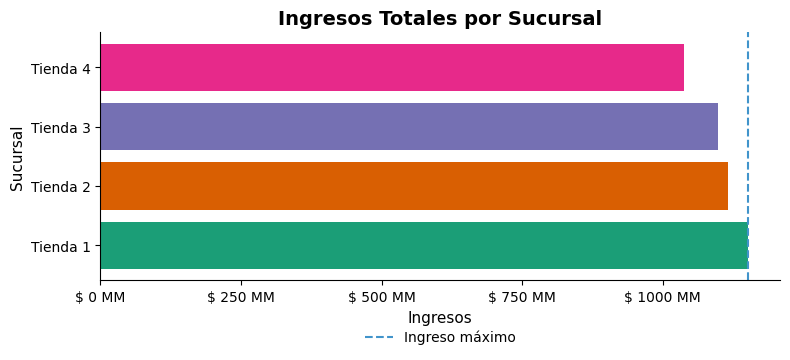

In [127]:
# Gráfico ingresos totales por tienda

cmap = plt.get_cmap("Dark2").colors
valor_max = ingresos_df["Ingresos Totales"].max()

legend_elements = [Line2D([0], [0], linestyle="--", linewidth=1.5, color="#4194CB", label="Ingreso máximo")]

plt.figure(figsize=(8, 4))

plt.barh(ingresos_df.index, ingresos_df["Ingresos Totales"], edgecolor="none", color=cmap[:len(ingresos_df)])

plt.axvline(x=valor_max, linestyle="--", color="#4194CB", linewidth=1.5)

plt.legend(handles=legend_elements, loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)

plt.title("Ingresos Totales por Sucursal", fontsize=14,fontweight="bold")
plt.xlabel("Ingresos", fontsize=11)
plt.ylabel("Sucursal", fontsize=11)

def formato_moneda_millones(x, pos):
    return f"$ {x/1_000_000:.0f} MM"

ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(formato_moneda_millones))
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

### *2. Comparativa de Ventas: Popularidad de Categorías por Tienda*

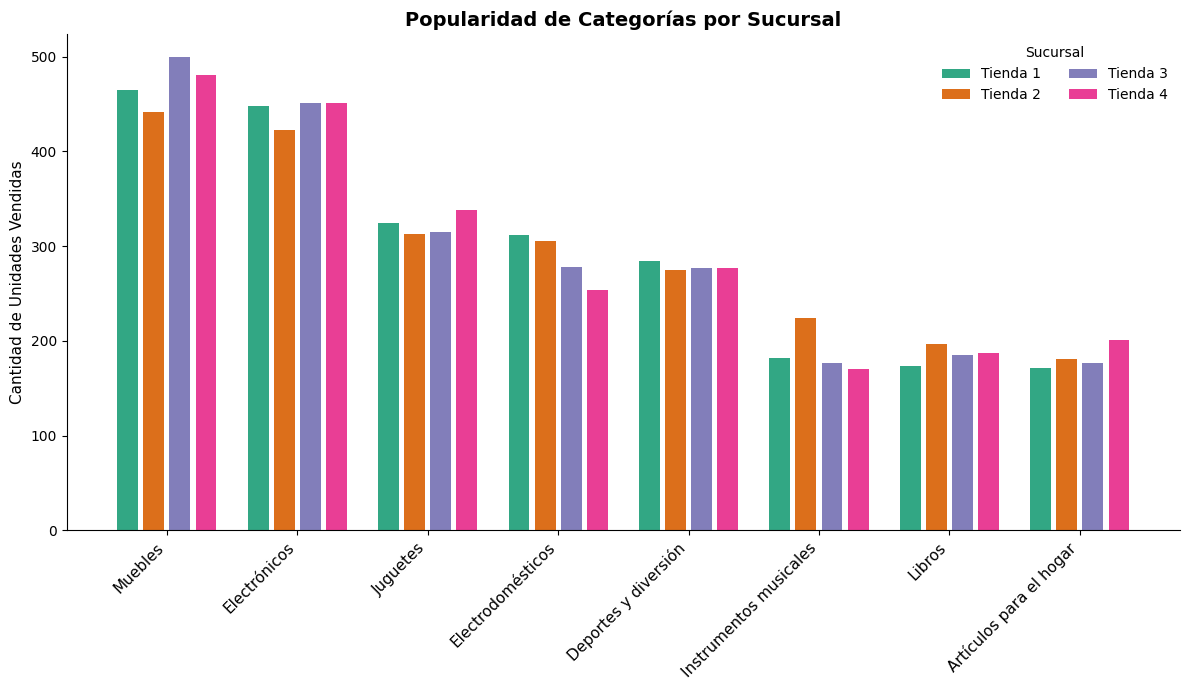

In [128]:
# Gráfico Comparativa de Ventas: Popularidad de Categorías por Tienda

categorias = resumen_ventas_categorias["Categoría"].unique()
tiendas = store_names

x = np.arange(len(categorias))
width = 0.2
gap = 0.04
bar_width = width - gap

colors = plt.get_cmap("Dark2").colors

fig, ax = plt.subplots(figsize=(12, 7))

for i, tienda in enumerate(tiendas):
    store_data = resumen_ventas_categorias[
        resumen_ventas_categorias["Tienda"] == tienda
    ]

    counts = [
        store_data[store_data["Categoría"] == cat]["Cantidad Vendida"].values[0]
        if cat in store_data["Categoría"].values else 0
        for cat in categorias
    ]

    ax.bar(
    x + (i - 1.5) * width,
    counts,
    bar_width,
    label=tienda,
    color=colors[i],
    edgecolor="none",
    alpha=0.9
)

ax.set_title("Popularidad de Categorías por Sucursal", fontsize=14, fontweight="bold")
ax.set_ylabel("Cantidad de Unidades Vendidas", fontsize=11)
ax.set_xticks(x)
ax.set_xticklabels(categorias, rotation=45, fontsize=11, ha="right")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.legend(title="Sucursal", frameon=False, ncol=2)

plt.tight_layout()
plt.show()

### *3. Satisfacción promedio de los clientes por tienda*

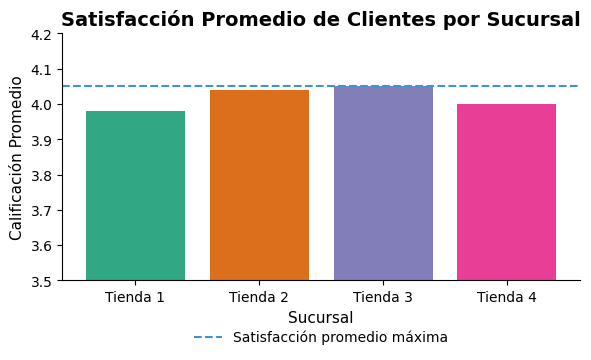

In [129]:
# Gráfico satisfacción promedio de los clientes por tienda

colors = plt.get_cmap("Dark2").colors

valor_max = resumen_calificacion["Calificación Promedio"].max()


legend_elements = [Line2D([0], [0], linestyle="--", linewidth=1.5, color="#4194CB", label="Satisfacción promedio máxima")]

plt.figure(figsize=(6, 4))

plt.bar(resumen_calificacion["Tienda"], resumen_calificacion["Calificación Promedio"], color=colors[:len(resumen_calificacion)], edgecolor="none", alpha=0.9)

plt.axhline(y=valor_max, linestyle="--", linewidth=1.5, color="#4194CB")

plt.legend(handles=legend_elements, loc="upper center", bbox_to_anchor=(0.5, -0.15), frameon=False)

plt.ylim(3.5, 4.2)

plt.title("Satisfacción Promedio de Clientes por Sucursal", fontsize=14, fontweight="bold")
plt.ylabel("Calificación Promedio", fontsize=11)
plt.xlabel("Sucursal", fontsize=11)

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

### *4. Productos más y menos vendidos por tienda*

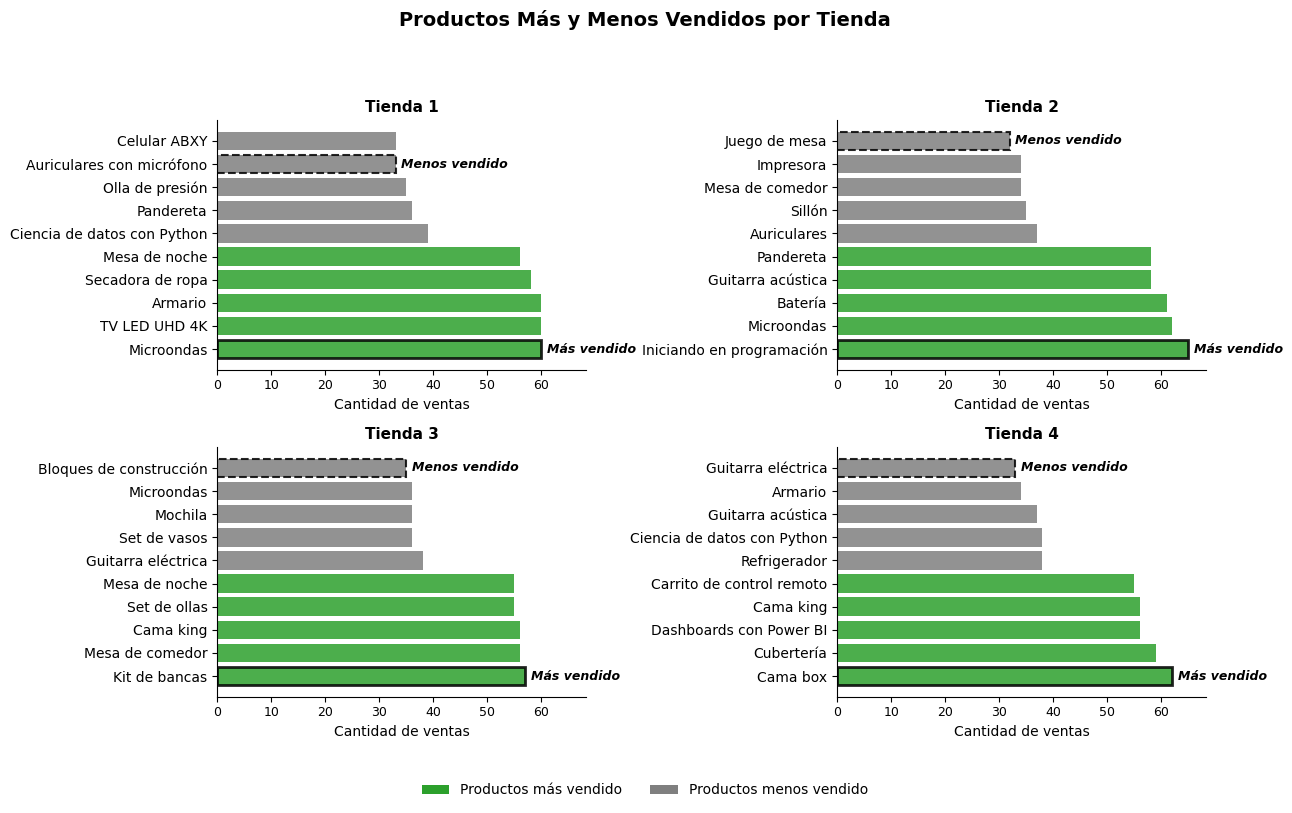

In [130]:
# Gráfico productos más y menos vendidos por tienda

df_plot = resumen_productos.copy()

tiendas = df_plot["Tienda"].unique()

legend_elements = [Patch(facecolor="tab:green", label="Productos más vendido"), Patch(facecolor="tab:gray", label="Productos menos vendido")]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 8), sharex=True)

axes = axes.flatten()

for ax, tienda in zip(axes, tiendas):
    datos = df_plot[df_plot["Tienda"] == tienda]

    colores = datos["Tipo"].map({"Más vendido": "tab:green", "Menos vendido": "tab:gray"})

    bars = ax.barh(datos["Producto"], datos["Cantidad"], color=colores, alpha=0.85)

    max_idx = datos["Cantidad"].idxmax()
    min_idx = datos["Cantidad"].idxmin()

    for i, bar in enumerate(bars):
        fila = datos.iloc[i]

        if fila.name == max_idx:
            bar.set_edgecolor("black")
            bar.set_linewidth(2)
            ax.text(
                bar.get_width() + 1,
                bar.get_y() + bar.get_height() / 2,
                "Más vendido",
                va="center",
                fontsize=9,
                weight="bold",
                fontstyle='italic'
            )

        if fila.name == min_idx:
            bar.set_edgecolor("black")
            bar.set_linewidth(1.5)
            bar.set_linestyle("--")
            ax.text(
                bar.get_width() + 1,
                bar.get_y() + bar.get_height() / 2,
                "Menos vendido",
                va="center",
                fontsize=9,
                weight="bold",
                fontstyle='italic'
            )

    ax.tick_params(axis="x", labelsize=9,labelbottom=True)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    ax.set_title(tienda, fontsize=11, weight="bold")
    ax.set_xlabel("Cantidad de ventas")
    ax.set_ylabel("")

fig.suptitle("Productos Más y Menos Vendidos por Tienda", fontsize=14, weight="bold")

fig.legend(handles=legend_elements, loc="lower center", ncol=2, frameon=False, bbox_to_anchor=(0.5, -0.02))

plt.tight_layout(rect=[0, 0.05, 1, 0.93])
plt.show()

> El análisis de productos más y menos vendidos evidencia diferencias claras en el desempeño comercial de cada tienda. Mientras algunos productos concentran una alta proporción de las ventas, otros presentan una rotación significativamente baja. Estas diferencias permiten identificar productos estrella que impulsan los ingresos, así como productos que no generan valor suficiente y podrían ser revisados o retirados del portafolio.

### *5. Envío promedio por tienda*

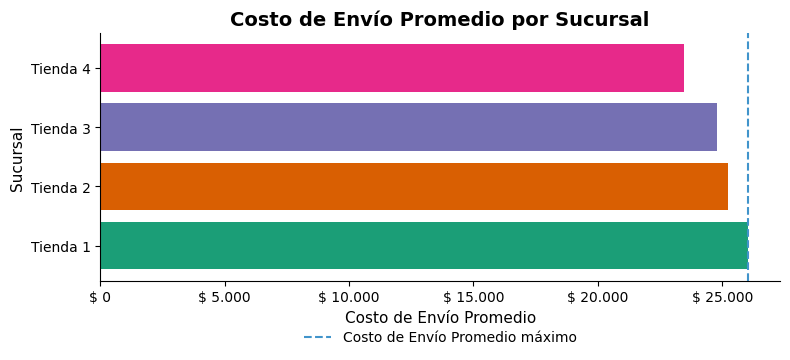

In [131]:
# Gráfico Envío promedio por tienda

envios_df = resumen_envios.copy()

cmap = plt.get_cmap("Dark2").colors
valor_max = envios_df["Costo Envío Promedio"].max()

legend_elements = [Line2D([0], [0], linestyle="--", linewidth=1.5, color="#4194CB", label="Costo de Envío Promedio máximo")]

plt.figure(figsize=(8, 4))

plt.barh(envios_df["Tienda"], envios_df["Costo Envío Promedio"], edgecolor="none", color=cmap[:len(envios_df)])

plt.axvline(x=valor_max, linestyle="--", color="#4194CB", linewidth=1.5)

plt.legend(handles=legend_elements, loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)

plt.title("Costo de Envío Promedio por Sucursal", fontsize=14, fontweight="bold")
plt.xlabel("Costo de Envío Promedio", fontsize=11)
plt.ylabel("Sucursal", fontsize=11)

def formato_moneda(x, pos):
    return f"$ {x:,.0f}".replace(",", ".")

ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(formato_moneda))

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

### *6. Matriz de Eficiencia y Matriz de Valor Estratégico*

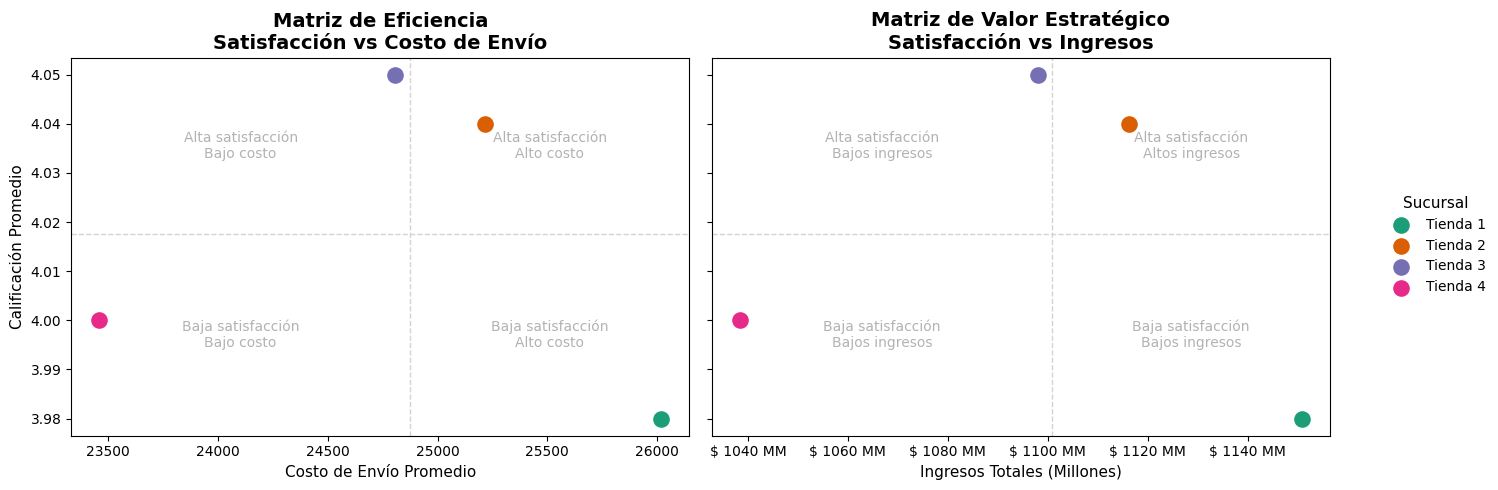

In [132]:
# Gráfico de la Matriz de Eficiencia y la Matriz de Valor Estratégico

colors = plt.get_cmap("Dark2").colors

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

# Matriz 1: Costos vs Satisfacción

ax = axes[0]

for i, row in matriz_eficiencia.iterrows():
    ax.scatter(
        row["Costo Envío Promedio"],
        row["Calificación Promedio"],
        s=120,
        color=colors[i],
        label=row["Tienda"],
        zorder=3
)

ax.axhline(matriz_eficiencia["Calificación Promedio"].mean(), linestyle="--", color="lightgray", linewidth=1)

ax.axvline(matriz_eficiencia["Costo Envío Promedio"].mean(), linestyle="--", color="lightgray", linewidth=1)

ax.set_title("Matriz de Eficiencia\nSatisfacción vs Costo de Envío", fontsize=14, fontweight="bold")
ax.set_xlabel("Costo de Envío Promedio", fontsize=11)
ax.set_ylabel("Calificación Promedio", fontsize=11)

mean_x = matriz_eficiencia["Costo Envío Promedio"].mean()
mean_y = matriz_eficiencia["Calificación Promedio"].mean()

x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()

ax.text((x_min + mean_x) / 2, (mean_y + y_max) / 2, "Alta satisfacción\nBajo costo", color="gray", fontsize=10, ha="center", va="center", alpha=0.6)

ax.text((mean_x + x_max) / 2, (mean_y + y_max) / 2, "Alta satisfacción\nAlto costo", color="gray", fontsize=10, ha="center", va="center", alpha=0.6)

ax.text((x_min + mean_x) / 2, (y_min + mean_y) / 2, "Baja satisfacción\nBajo costo", color="gray", fontsize=10, ha="center", va="center", alpha=0.6)

ax.text((mean_x + x_max) / 2, (y_min + mean_y) / 2, "Baja satisfacción\nAlto costo", color="gray", fontsize=10, ha="center", va="center", alpha=0.6)

# Matriz 2: Ingresos vs Satisfacción

ax = axes[1]

for i, row in matriz_valor.iterrows():
    ax.scatter(
        row["Ingresos Totales"],
        row["Calificación Promedio"],
        s=120,
        color=colors[i],
        label=row["Tienda"],
        zorder=3
    )

ax.axhline(matriz_valor["Calificación Promedio"].mean(), linestyle="--", color="lightgray", linewidth=1)

ax.axvline(matriz_valor["Ingresos Totales"].mean(), linestyle="--", color="lightgray", linewidth=1)

def millones(x, pos):
    return f"$ {x/1_000_000:.0f} MM"

ax.xaxis.set_major_formatter(FuncFormatter(millones))

ax.set_title("Matriz de Valor Estratégico\nSatisfacción vs Ingresos", fontsize=14, fontweight="bold")
ax.set_xlabel("Ingresos Totales (Millones)", fontsize=11)

mean_x = matriz_valor["Ingresos Totales"].mean()
mean_y = matriz_valor["Calificación Promedio"].mean()

x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()

ax.text((x_min + mean_x) / 2, (mean_y + y_max) / 2, "Alta satisfacción\nBajos ingresos", color="gray", fontsize=10, ha="center", va="center", alpha=0.6)

ax.text((mean_x + x_max) / 2, (mean_y + y_max) / 2, "Alta satisfacción\nAltos ingresos", color="gray", fontsize=10, ha="center", va="center", alpha=0.6)

ax.text((x_min + mean_x) / 2, (y_min + mean_y) / 2, "Baja satisfacción\nBajos ingresos", color="gray", fontsize=10, ha="center", va="center", alpha=0.6)

ax.text((mean_x + x_max) / 2, (y_min + mean_y) / 2, "Baja satisfacción\nBajos ingresos", color="gray", fontsize=10, ha="center", va="center", alpha=0.6)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Sucursal", loc="center right", frameon=False, fontsize=10, title_fontsize=11)

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


> El coeficiente de correlación obtenido (r = 0,99997) entre las variables de ambas matrices, indica una correlación positiva muy fuerte entre las variables analizadas. Esto sugiere que las tiendas mantienen un posicionamiento relativo similar tanto en la matriz de eficiencia (satisfacción vs. costo de envío) como en la matriz de valor estratégico (satisfacción vs. ingresos), lo que se refleja en una tendencia visual coherente entre ambos gráficos y la similitud en la distribución de los puntos correspondientes a las tiendas.

> La matriz de eficiencia y matriz de valor estratégico evidencian que la Tienda 4 combina una calificación promedio inferior con un costo de envío que no genera una percepción de valor superior para el cliente, así como el menor ingreso total de toda la cadena. En contraste, otras tiendas logran mejores niveles de satisfacción con costos similares o mayores ingresos. Este patrón muestra que la Tienda 4 presenta el menor desempeño relativo dentro del portafolio.

### *7. Análisis del desempeño geográfico*

In [133]:
# Crear Data Frame para tener los datos asociados al desempeño geográfico de las tiendas

df_geo = pd.concat([df.assign(Tienda=store_names[i]) for i, df in enumerate(dfs)])

df_geo[["Tienda", "lat", "lon"]].head()

,Tienda,lat,lon
0,Tienda 1,4.60971,-74.08175
1,Tienda 1,6.25184,-75.56359
2,Tienda 1,10.39972,-75.51444
3,Tienda 1,3.43722,-76.52250
4,Tienda 1,6.25184,-75.56359


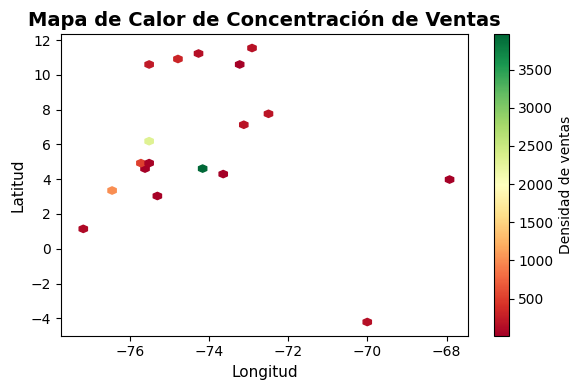

In [134]:
# Gráfico de mapa de calor para visualizar las regiones con mayor y menor concentración de ventas

plt.figure(figsize=(6, 4))

hb = plt.hexbin(df_geo["lon"], df_geo["lat"], gridsize=45, cmap="RdYlGn", mincnt=1)

plt.colorbar(hb, label="Densidad de ventas")
plt.title("Mapa de Calor de Concentración de Ventas", fontsize=14, fontweight="bold")
plt.xlabel("Longitud", fontsize=11)
plt.ylabel("Latitud", fontsize=11)
plt.tight_layout()
plt.show()

> Este mapa de calor muestra claramente regiones con alta y baja concentración de ventas (Densidad de ventas). Estas zonas coinciden con áreas donde operan mejor las tiendas con mayor ingreso. Las regiones con baja densidad presentan menor actividad comercial.

In [135]:
# Mapa interactivo de las ventas

import folium

mapa = folium.Map(location=[df_geo["lat"].mean(), df_geo["lon"].mean()], zoom_start=5)

for _, row in df_geo.sample(500).iterrows():
    folium.CircleMarker(
        location=[row["lat"], row["lon"]],
        radius=2,
        popup=row["Tienda"],
        fill=True
    ).add_to(mapa)

mapa

## ***Informe Final del Análisis de las Sucursales de Alura Store***
---

### *1. Introducción*

El propósito de este análisis es apoyar en la toma de decisiones estratégicas respecto a cuál de las cuatro sucursales de la cadena Alura Store debería venderse para iniciar un nuevo emprendimiento.
Para ello, se realizó un análisis exploratorio y descriptivo de los datos de ventas de cada tienda, considerando variables clave como ingresos, categorías de productos, satisfacción del cliente, productos más y menos vendidos y costos de envío.
Además, se utilizaron visualizaciones de datos para facilitar la interpretación de los resultados y comparar de manera objetiva el desempeño relativo de cada tienda.

### *2. Desarrollo del análisis*

#### *2.1 Ingresos totales por tienda*

El análisis de los ingresos totales, visualizado mediante un gráfico de barras, muestra diferencias claras entre las tiendas.
La Tienda 1 presenta el mayor nivel de ingresos, consolidándose como la más rentable. Las Tiendas 2 y 3 mantienen un desempeño intermedio y estable. En contraste, la Tienda 4 registra el menor ingreso total de toda la cadena, lo que indica una menor contribución financiera al negocio global.

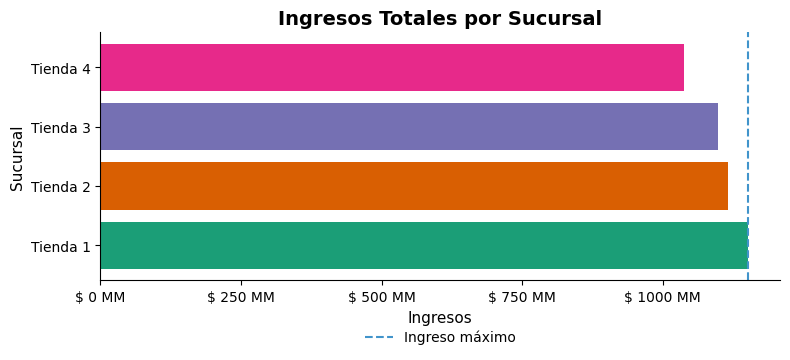

#### *2.2 Ventas por categoría de productos*

Al analizar las ventas por categoría, se observa que las tiendas con mayor ingreso presentan una mayor diversidad de categorías bien posicionadas, lo que reduce la dependencia de un solo tipo de producto.
La Tienda 4, en cambio, muestra una menor variedad de categorías destacadas y una concentración más baja de ventas, lo que limita su capacidad de competir y crecer frente a las demás tiendas.

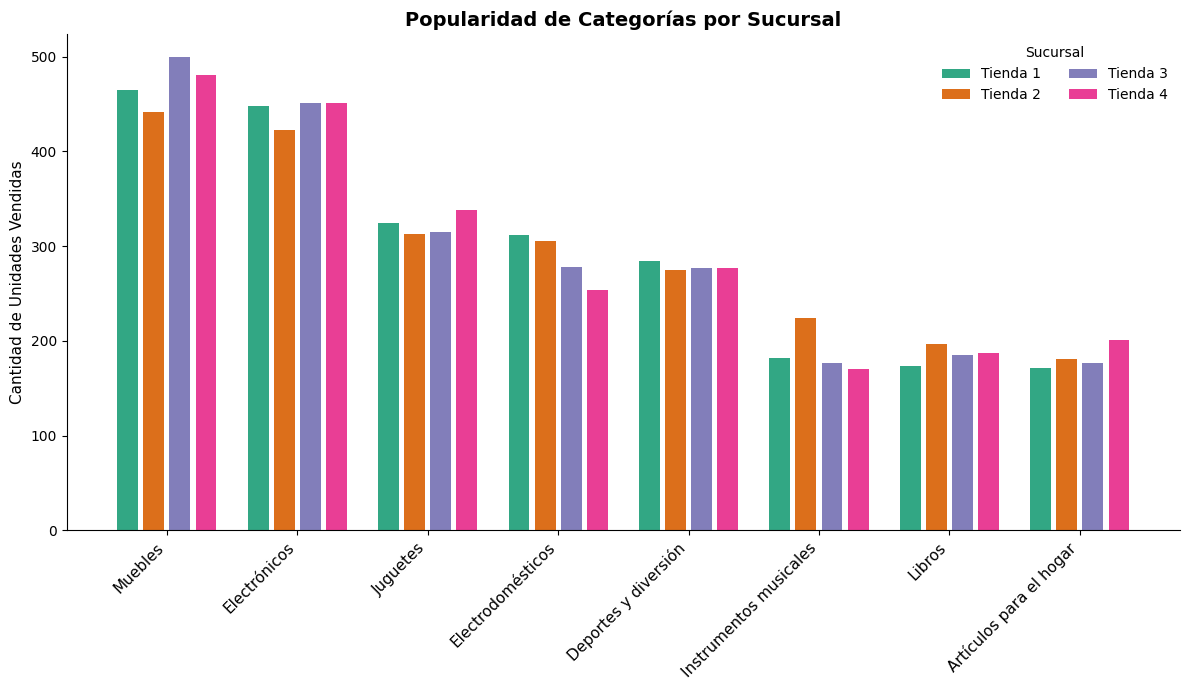

#### *2.3 Calificación promedio de los clientes*

La satisfacción del cliente, medida a través de la calificación promedio, es un indicador clave de la experiencia de compra.
Los gráficos muestran que la Tienda 3 alcanza la mejor valoración promedio, seguida de la Tienda 2. La Tienda 4 presenta una calificación inferior, sin diferenciarse positivamente en relación con las otras tiendas, lo que sugiere oportunidades de mejora en la experiencia del cliente.

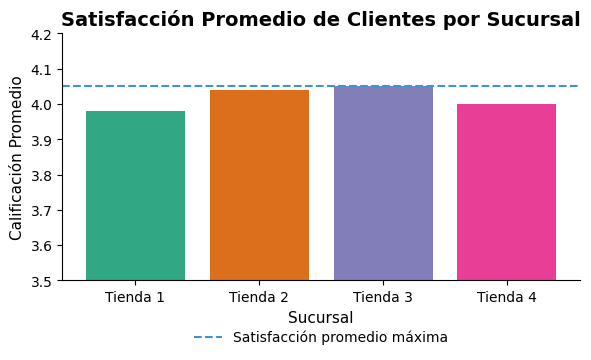

#### *2.4 Productos más y menos vendidos*

El análisis de los productos más y menos vendidos refuerza los resultados anteriores.
Las tiendas con mejor desempeño cuentan con productos líderes claramente identificados, con altos niveles de venta. La Tienda 4 presenta productos con baja rotación y menor volumen de ventas, lo que impacta negativamente en su desempeño comercial y en su competitividad dentro de la cadena.

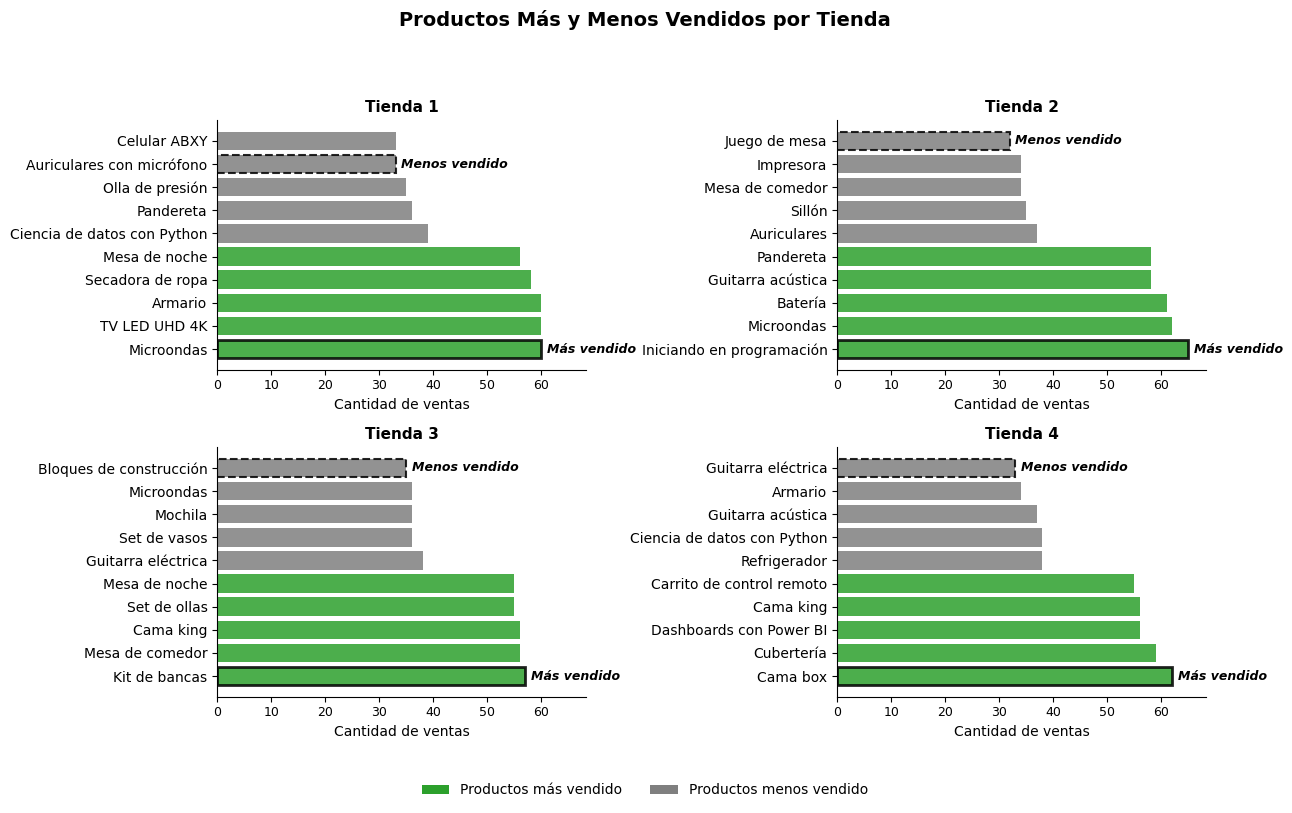

#### *2.5 Costo de envío promedio*

En cuanto al costo de envío promedio, la Tienda 4 registra el valor más bajo. Sin embargo, este menor costo no se traduce en mayores ingresos ni en una mayor satisfacción del cliente, lo que indica que el precio del envío, por sí solo, no es suficiente para generar una ventaja competitiva sostenible.

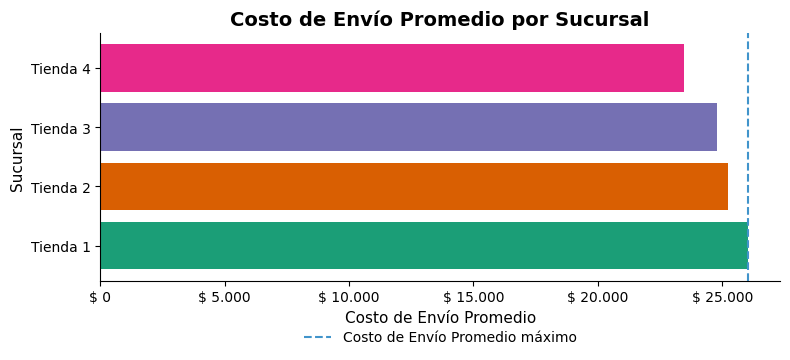

#### *2.6 Análisis integrado: eficiencia, valor estratégico y desempeño*

Al integrar los indicadores de ingresos, satisfacción y costos, las visualizaciones evidencian que la Tienda 4 presenta el menor nivel de eficiencia global.
Mientras otras tiendas logran equilibrar ingresos, diversidad de productos y satisfacción del cliente, la Tienda 4 no destaca en ninguno de estos aspectos clave, lo que la posiciona como la unidad menos estratégica dentro del portafolio de Alura Store.

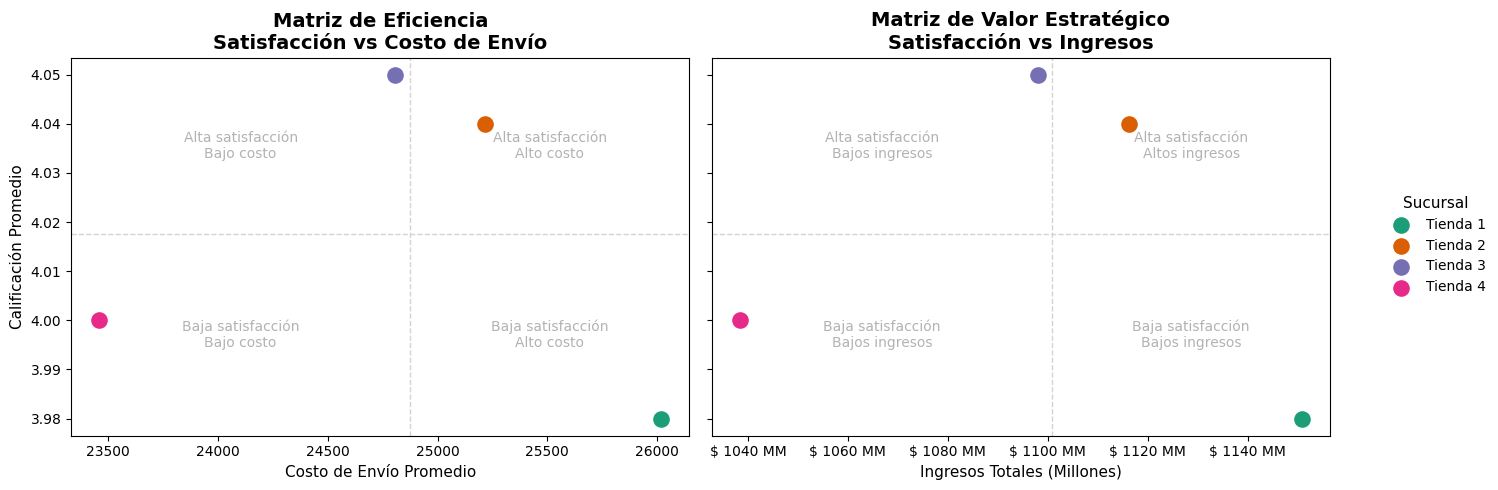

#### *2.7 Análisis geográfico*

Existen patrones claros de concentración de ventas en determinadas regiones. Las tiendas con mayor ingreso presentan mejor cobertura y mayor densidad geográfica.

La Tienda 4 muestra:

- Menor densidad de ventas

- Menor concentración de ingresos

Esto confirma que su bajo rendimiento no depende de la ubicación, sino de su desempeño estructural.

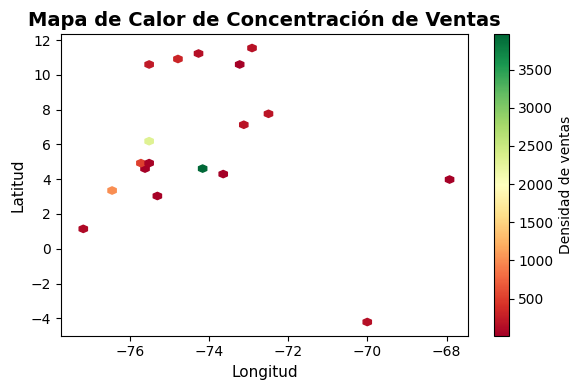

#### *2.8 Análisis de criterios adiconales de decisión*

La Tienda 4 es la menos eficiente de Alura Store según el índice de Eficiencia Global, que combina ingresos, satisfacción del cliente y costos de envío. Su bajo desempeño se concentra en las categorías de Instrumentos musicales (3.91) y Electrodomésticos (3.93), con productos críticos como TV LED UHD 4K (3.58) y Guitarra acústica (3.68). Incluso vendedores con buen historial en otras sucursales, como Pedro Gomez, presentan calificaciones bajas en esta tienda, lo que apunta a problemas operativos, logísticos o de inventario, más que de personal. En conjunto, estos factores posicionan a la Tienda 4 como la unidad menos estratégica del portafolio.

### *3. Conclusión y recomendación final*

**Tienda recomendada para vender: Tienda 4**

Considerando de manera integral todos los factores analizados y respaldado por los gráficos generados, se recomienda la venta de la Tienda 4, debido a que:

  - Presenta el menor ingreso total de las cuatro tiendas.

  - No destaca en la venta de categorías clave ni en la rotación de productos.

  - Tiene una calificación promedio inferior, reflejando una menor satisfacción del cliente.

  - Sus productos más vendidos no alcanzan el nivel de desempeño observado en otras tiendas.

  - Aunque posee el costo de envío más bajo, este factor no compensa sus debilidades en ingresos y experiencia del cliente.

  - Vendedores con buen historial en otras sucursales, como Pedro Gomez, presentan calificaciones bajas en esta tienda.

  - Muestra la menor eficiencia global dentro del portafolio.

La venta de la Tienda 4 permitiría liberar recursos financieros y operativos para invertir en un nuevo emprendimiento, al mismo tiempo que mantiene en funcionamiento las tiendas con mejor desempeño, mayor rentabilidad y mayor potencial de crecimiento, aumentando la sostenibilidad y rentabilidad de Alura Store en el largo plazo.

### *4. Recomendación adicional*

Se sugiere potenciar las Tiendas 1, 2 y 3:

- **Tienda 1:** Maximizar su liderazgo en ingresos y escalar buenas prácticas para mejorar la satisfacción del cliente.

- **Tienda 2:** Mantener y optimizar su equilibrio entre ingresos y experiencia del cliente.

- **Tienda 3:** Capitalizar su alta satisfacción del cliente, potenciando marketing y fidelización.

De este modo, Alura Store podrá optimizar su portafolio, enfocándose en las unidades que aportan mayor valor al negocio.